In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
#!/usr/bin/env python
# coding: utf-8

# # Make a [tonic](https://tonic.readthedocs.io/en/latest/) dataset - see [documentation](https://tonic.readthedocs.io/en/latest/tutorials/wrapping_own_data.html)
# ## Example with the RGB frames dataset provided by NTUA, translated by UCA into events using vid2e

import sys
sys.path.append('../dev/')
from dataset_creation_aprovis3d import aprovis3dDataset
from hots.utils import get_dataset_info


# path where you'll go to find your .npy files to make the dataset with
### TO BE MODIFIED
path = '../../Data/DVS128_ZED_NUC_jAER/'
# gives the data type - here we use experimental data, stored as npy
data_type = 'experimental'
# gives a patch_size to divide spatially the event streams
patch_size = (16,16)
# gives a max duration for the samples of the dataset to divide temporally the event streams
max_duration = 1e3 # (in ms)
# labels given to the different classes of the dataset
labelz = ['sea','gro']
# original sensor_size of the DVS (width,height,polarity)
sensor_size = [128, 128, 2]
# discard samples with less than min_num_events events
min_num_events = 1000
# split the recordings into train and test sets with train_test_ratio ratio
train_test_ratio = .75
# gives the indexing of the event stream
ordering = 'xytp'

trainset = aprovis3dDataset(save_to=path, data_type=data_type, classes=labelz, train=True, patch_size=patch_size, max_duration=max_duration, sensor_size=sensor_size)

In [3]:
testset = aprovis3dDataset(save_to=path, data_type=data_type, classes=labelz, train=False, patch_size=patch_size, max_duration=max_duration, sensor_size=sensor_size)

In [4]:
# **Synthetic_Dataset** goes to find the repository where the dataset with the corresponding *patch_size* and *max_duration* is stored. It is stored in *path/patch_{patch_size}_duration_{max_duration}/* and splitted into *./train/* and *./test/* repositories which are splitted into labelz repositories. 
# 
# If this repository does not exists it calls the function **build_aprovis_dataset** and makes the dataset storage by loading all the .csv files into *path* and treat them with the function **save_as_patches**.
# 
# The advantage of using the class defined by torch or tonic modules to make a dataset is that we can easily make a loader of the samples and use some transforms already existing in these modules. 

# # Get information about the dataset
# Some statistics of the dataset can be easily observed with the **get_dataset_info** function. You have to put trainset and testset as input, if you only have one dataset you can put it twice. 
# 
# The default properties to be visualized are:
# - the *mean_isi* or mean Inter-Spike Interval: the time difference between to consecutive events (polarity is taken into account and then the ISI is computed for events of the same polarity and then averaged). This measure is inversely proportional to the density of events in the event stream. 
# - the *null_isi* or the ratio of synchronous events in the recording: the ratio of events when the ISI is equal to 0 meaning they arrive at the exact same timing. A big *null_isi* value means that there is a lot of synchrnous events, maybe because the event stream is made from frames. 
# - the number of events per sample (indicative when the duration of the samples is the same)
# - other properties can be asked to be plotted like the *median_isi* or can be developed in **get_properties** in order to visualize different features of the dataset. 

events, label = next(iter(trainset))
print(trainset.ordering)
print(events[1000,:])

('x', 'y', 't', 'p')
[     9      0 919012      1]


number of samples in the trainset: 801
----------------------------------------
number of samples in each class for the trainset: [453. 348.]
----------------------------------------
Mean value for mean_isi: 805.8977765595998
Mean value for synchronous_events: 0.08434586120582227
Mean value for nb_events: 2765.413857677903


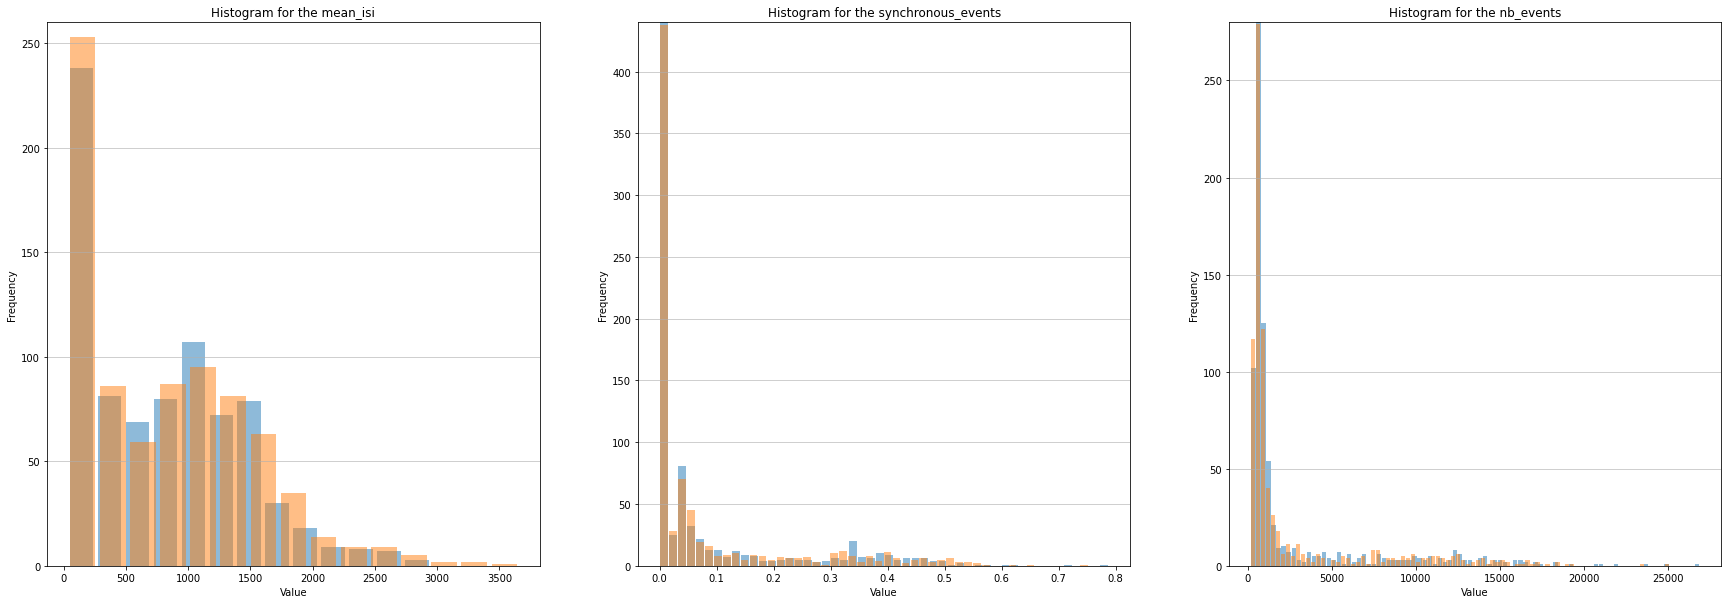

In [6]:
import matplotlib.pyplot as plt
values = get_dataset_info(trainset,testset, distinguish_polarities = True, distinguish_labels=False)
plt.show();

# Orange histograms are for the "ground" label and blue for the "sea":
# - one can notice that ground sessions contain way more events that sea ones (figure on the right)
# - this fact is also illustrated by the left figure with the Inter-Spike interval
# - on the middle the ratio of synchronous events are represented. One can see that the values are above .9 and quite close to 1 meaning that there are a lot of events with same timestamps. The fact that the output of the simulator may create frames and then convert them to events may trigger this artifact. 